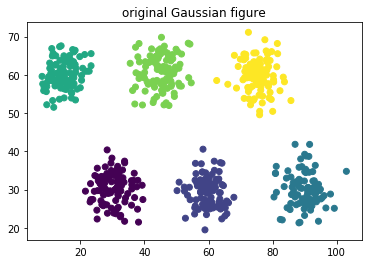

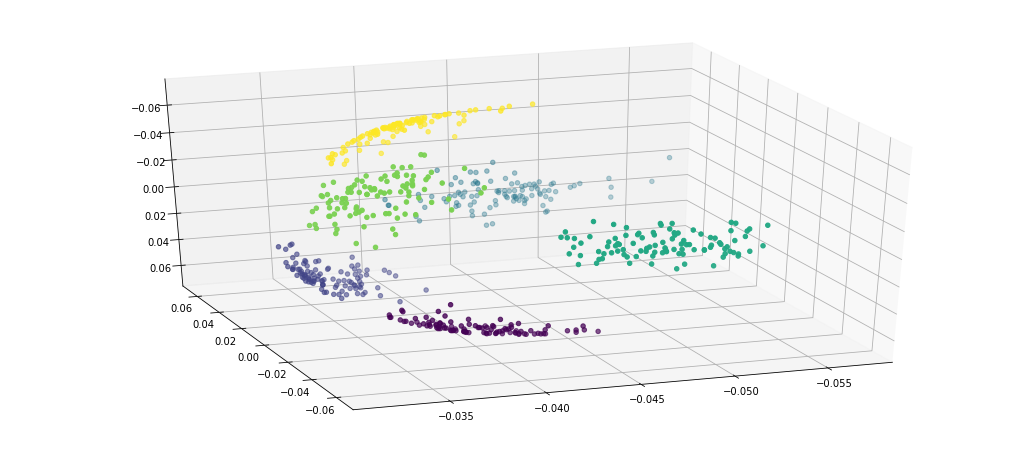

In [1]:
# 原图和对应谱空间流形
# %matplotlib notebook
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as LA
from mpl_toolkits.mplot3d.axes3d import Axes3D

# generate iris dataset or Gaussian circles and so on
choose_datasets = "muti_Gaussian_circles" # choose_datasets means which datasets will be choosed
if choose_datasets == "Gaussian_circles":
    # Gaussian circles
    feature, label = [], []
    cir_num = 3 # circles number
    cir_points_num = 100 # points number in a circles
    for i in range(1, cir_num+1):
        mean = [30 * i, 30]
        cov = [[15, 0], [0, 15]]
        fir_feat, sec_feat = np.random.multivariate_normal(mean, cov, cir_points_num).T
        feature.extend([[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
        #feature = np.append(feature, [[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
        label = np.append(label, i * np.ones(cir_points_num))
    feature = np.asarray(feature)
    # plot Gaussian datasets
    plt.figure()
    plt.title("original Gaussian figure")
    plt.scatter(feature[:, 0], feature[:, 1], c=label)
elif choose_datasets == "muti_Gaussian_circles":
    feature, label = [], []
    cir_num = 6 # circles number
    cir_points_num = 100 # points number in a circles
    for i in range(1, cir_num+1):
        if 1 <= i <= 3:
            mean = [30 * i, 30]
        elif 4 <= i <= 6:
            mean = [30* (i - 3) - 15, 60]
        cov = [[15, 0], [0, 15]]
        fir_feat, sec_feat = np.random.multivariate_normal(mean, cov, cir_points_num).T
        feature.extend([[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
        #feature = np.append(feature, [[fir_feat[m], sec_feat[m]] for m in range(len(fir_feat))])
        label = np.append(label, i * np.ones(cir_points_num))
    feature = np.asarray(feature)
    # plot Gaussian datasets
    plt.figure()
    plt.title("original Gaussian figure")
    plt.scatter(feature[:, 0], feature[:, 1], c=label)
else:
    # generate iris datasets
    iris = datasets.load_iris()
    feature = iris.data[:, :2]
    label = iris.target

# construct distance matrix 
dis_matrix = []
for i in range(feature.shape[0]):
    for j in range(feature.shape[0]):
        dis_matrix.append(LA.norm(feature[i]-feature[j], 2))
dis_matrix = np.reshape(dis_matrix, (feature.shape[0], feature.shape[0]))

# compute eigenvectors
w, v = LA.eig(dis_matrix)
fig = plt.figure(figsize=(14,6))
ax=Axes3D(fig, elev=-150, azim=110)
# ax.title("eigen-space projection")
#ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(v[:, 0], v[:, 1], v[:, 2], c=label)
plt.show()


admm algorithms

A partition method with ADMM method, code by pure python.

[  4 204]
begin and end 5 205
[399 404]
begin and end 400 405


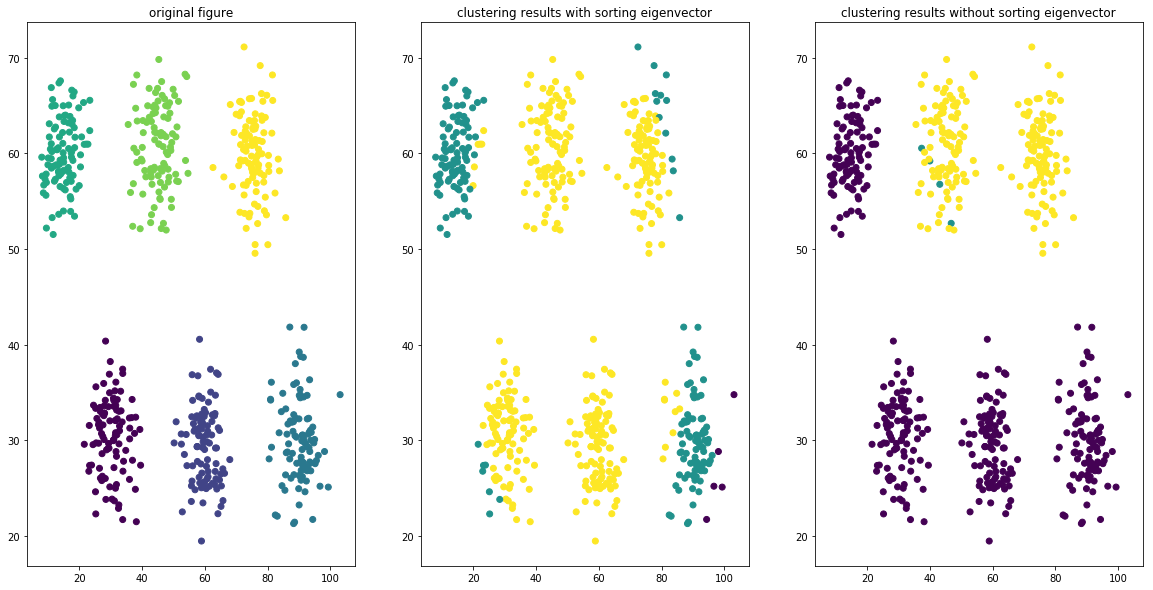

In [2]:
# 尝试不进行特征向量的排序，可能得不到分割效果
# test ADMM algorithm on the unsorted eigenvector
from admm_algorithms import admm, admm_without_sorting
n_label = admm(np.asarray(v[:, 0]), num_cuts=2)
un_label = admm_without_sorting(np.asarray(v[:, 0]), num_cuts=2)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("original figure")
plt.scatter(feature[:, 0], feature[:, 1], c=label)
plt.subplot(132)
plt.title("clustering results with sorting eigenvector")
plt.scatter(feature[:, 0], feature[:, 1], c=n_label)
plt.subplot(133)
plt.title("clustering results without sorting eigenvector")
plt.scatter(feature[:, 0], feature[:, 1], c=un_label)
plt.show()


[98 99]
begin and end 99 100
[298 304]
begin and end 299 305


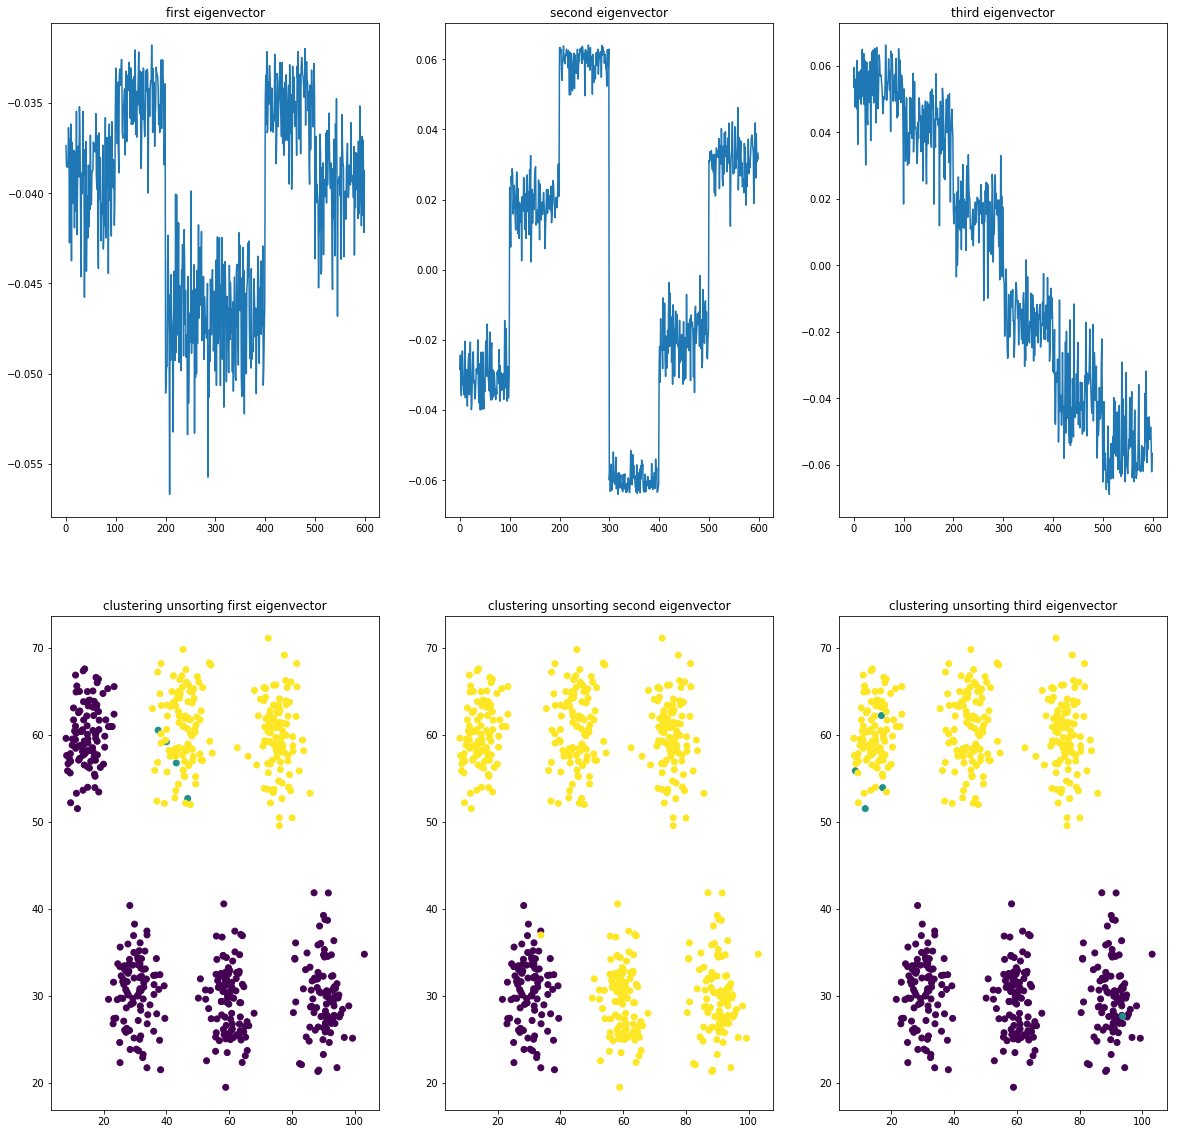

In [3]:
# 预先知道簇的排列顺序，对特征向量不排序也可能有分割效果，但是缺乏怎么去选择点的顺序后，不好应用到对于没有随机排列的特征向量，
# 这样做意义也不大。
# plot first three eigenvectors and coresponding results
sec_un_label = admm_without_sorting(np.asarray(v[:, 1]), num_cuts=2)
thr_un_label = admm_without_sorting(np.asarray(v[:, 2]), num_cuts=2)

plt.figure(figsize=(20,20))
plt.subplot(231)
plt.title("first eigenvector")
plt.plot(v[:, 0])

plt.subplot(232)
plt.title("second eigenvector")
plt.plot(v[:, 1])

plt.subplot(233)
plt.title("third eigenvector")
plt.plot(v[:, 2])

plt.subplot(234)
plt.title("clustering unsorting first eigenvector")
plt.scatter(feature[:, 0], feature[:, 1], c=un_label)

plt.subplot(235)
plt.title("clustering unsorting second eigenvector")
plt.scatter(feature[:, 0], feature[:, 1], c=sec_un_label)

plt.subplot(236)
plt.title("clustering unsorting third eigenvector")
plt.scatter(feature[:, 0], feature[:, 1], c=thr_un_label)

plt.show()

[1 4]
begin and end 2 5


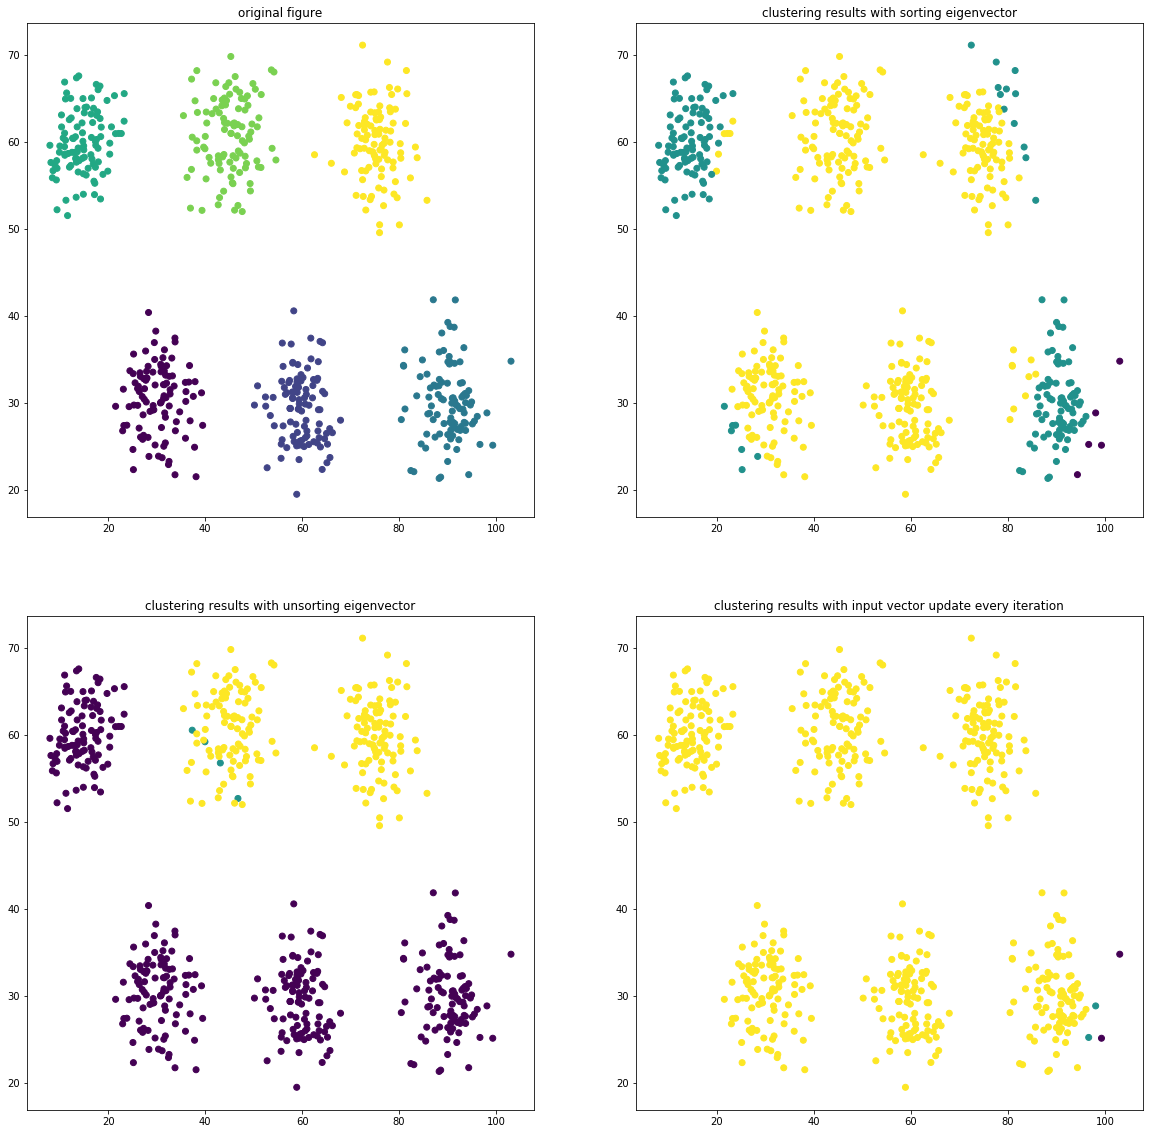

In [4]:
# 新的想法，每次他迭代的过程中，迭代后产生的向量带入到原代价函数中，最终是否能够产生划分的效果
from admm_algorithms import admm_vector_iter
iter_label = admm_vector_iter(v[:, 0], num_cuts=2)

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title("original figure")
plt.scatter(feature[:, 0], feature[:, 1], c=label)
plt.subplot(222)
plt.title("clustering results with sorting eigenvector")
plt.scatter(feature[:, 0], feature[:, 1], c=n_label)
plt.subplot(223)
plt.title("clustering results with unsorting eigenvector")
plt.scatter(feature[:, 0], feature[:, 1], c=un_label)
plt.subplot(224)
plt.title("clustering results with input vector update every iteration")
plt.scatter(feature[:, 0], feature[:, 1], c=iter_label)
plt.show()

[ 99 299]
begin and end 100 300
[152 403]
begin and end 153 404


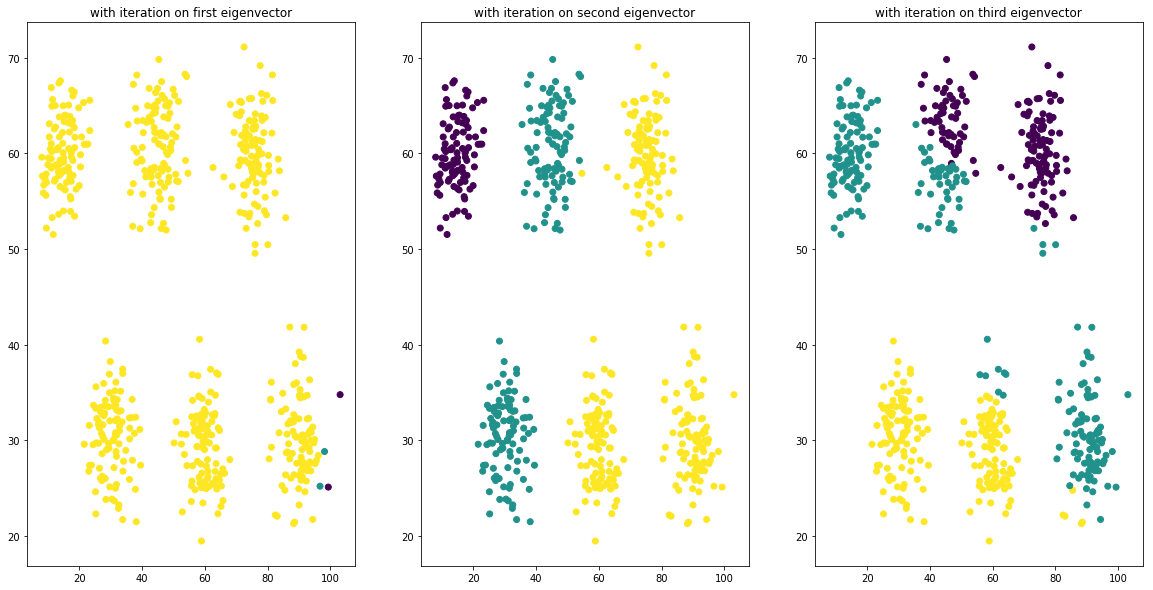

In [5]:
# 分别看看做杨做每根轴能得到什么效果，发现或许能够进行分割
sec_iter_label = admm_vector_iter(v[:, 1], num_cuts=2)
thr_iter_label = admm_vector_iter(v[:, 2], num_cuts=2)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("with iteration on first eigenvector")
plt.scatter(feature[:, 0], feature[:, 1], c=iter_label)
plt.subplot(132)
plt.title("with iteration on second eigenvector")
plt.scatter(feature[:, 0], feature[:, 1], c=sec_iter_label)
plt.subplot(133)
plt.title("with iteration on third eigenvector")
plt.scatter(feature[:, 0], feature[:, 1], c=thr_iter_label)

plt.show()

------------------------- (3, 12, 600)


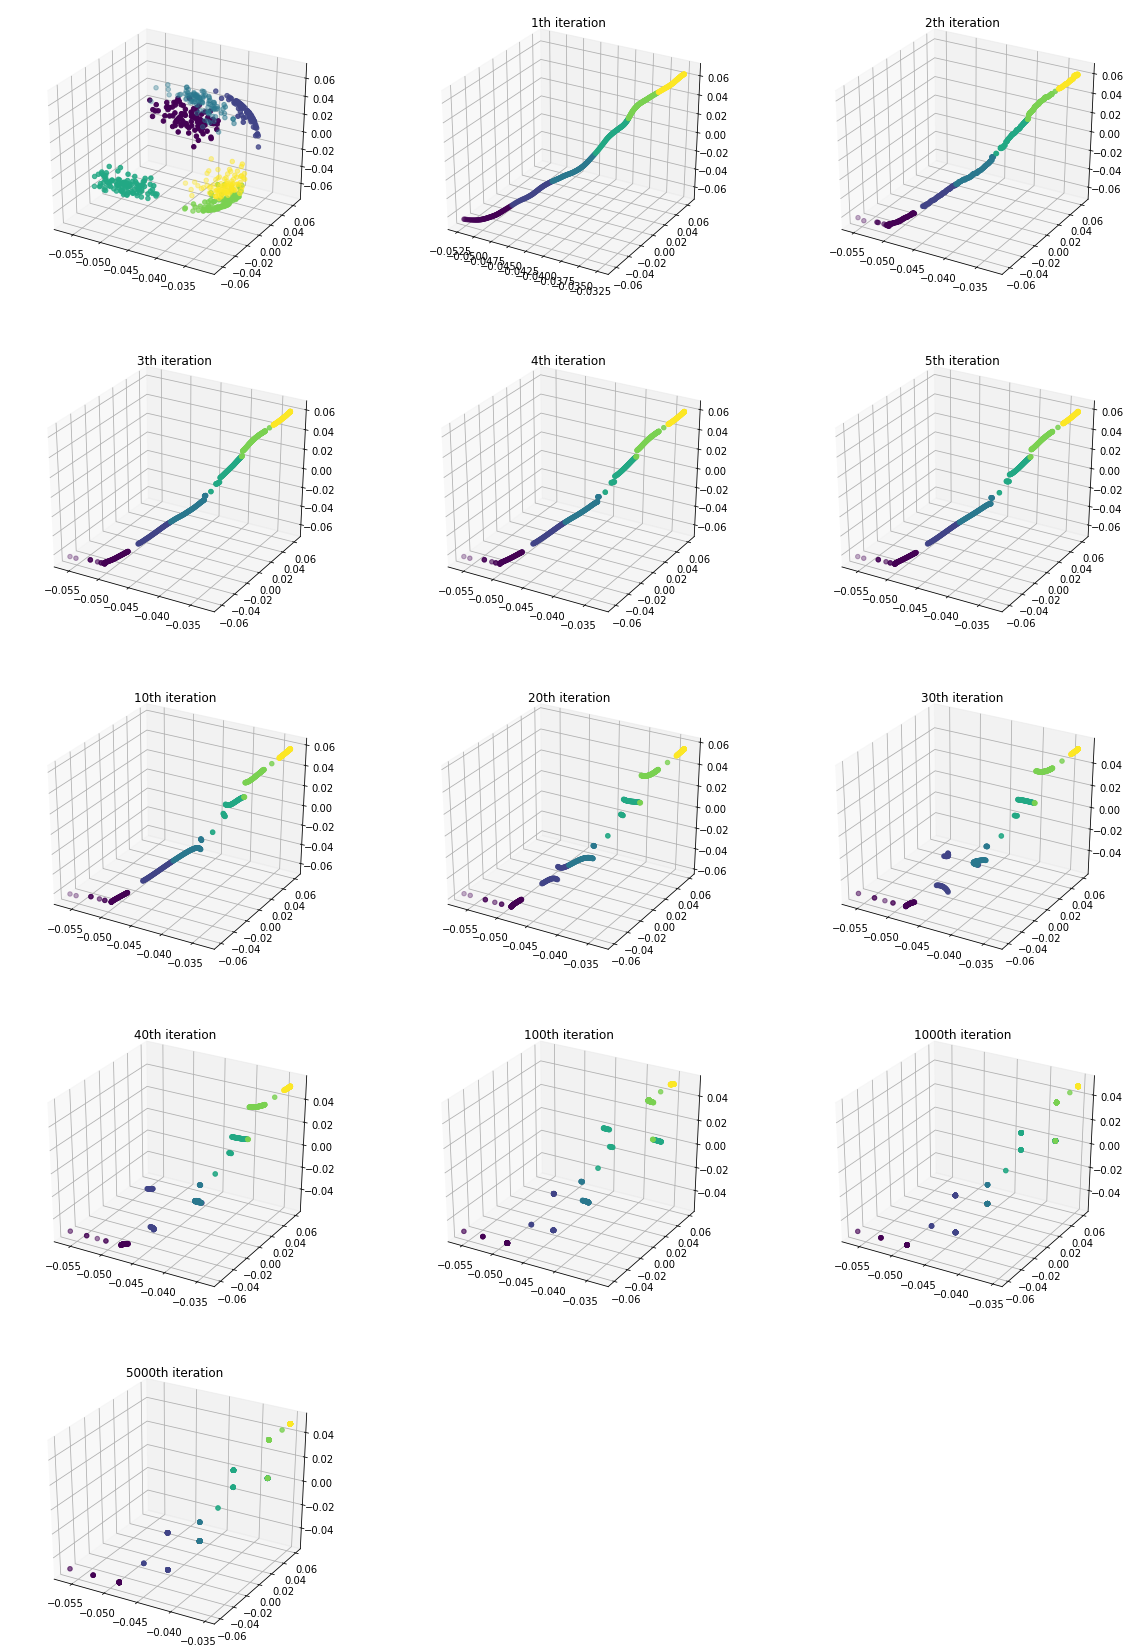

In [6]:
# 之前根据最终在每根轴上的分割效果似乎很难找到准则来区分分类问题，取交集的问题在于相信每个轴都一定取到了正确的切割。
# 考虑完全收敛不一定利于分割，若干次迭代后，流形可分性会不会更强？
# 这种情况下流形可分的准则是什么呢？为什么？

from admm_algorithms import mutiple_vector_admm
iter_count = [1, 2, 3, 4, 5, 10, 20, 30, 40, 100, 1000, 5000] # record一个迭代次数的列表
eigvectors = v[:, :3]
# return eigenspace coordinates after itertions
# iteration mode是是否采用每次迭代后向量作为新的向量迭代下去，目前作为保留。
cor = mutiple_vector_admm(eigvectors, iter_count, iteration_mode='iter_none', label=label, num_cuts=5) 
print("-------------------------", cor.shape)

fig = plt.figure(figsize=(20,30))
ax = fig.add_subplot(5, 3, 1, projection='3d')
ax.scatter(v[:, 0], v[:, 1], v[:, 2], c=label)

for i in range(cor.shape[1]):
    ax = fig.add_subplot(5, 3, i+2, projection='3d')
    ax.scatter(cor[0, i, :], cor[1, i, :], cor[2, i, :], c=label)
    ax.set_title("%ith iteration" %iter_count[i])
plt.show()


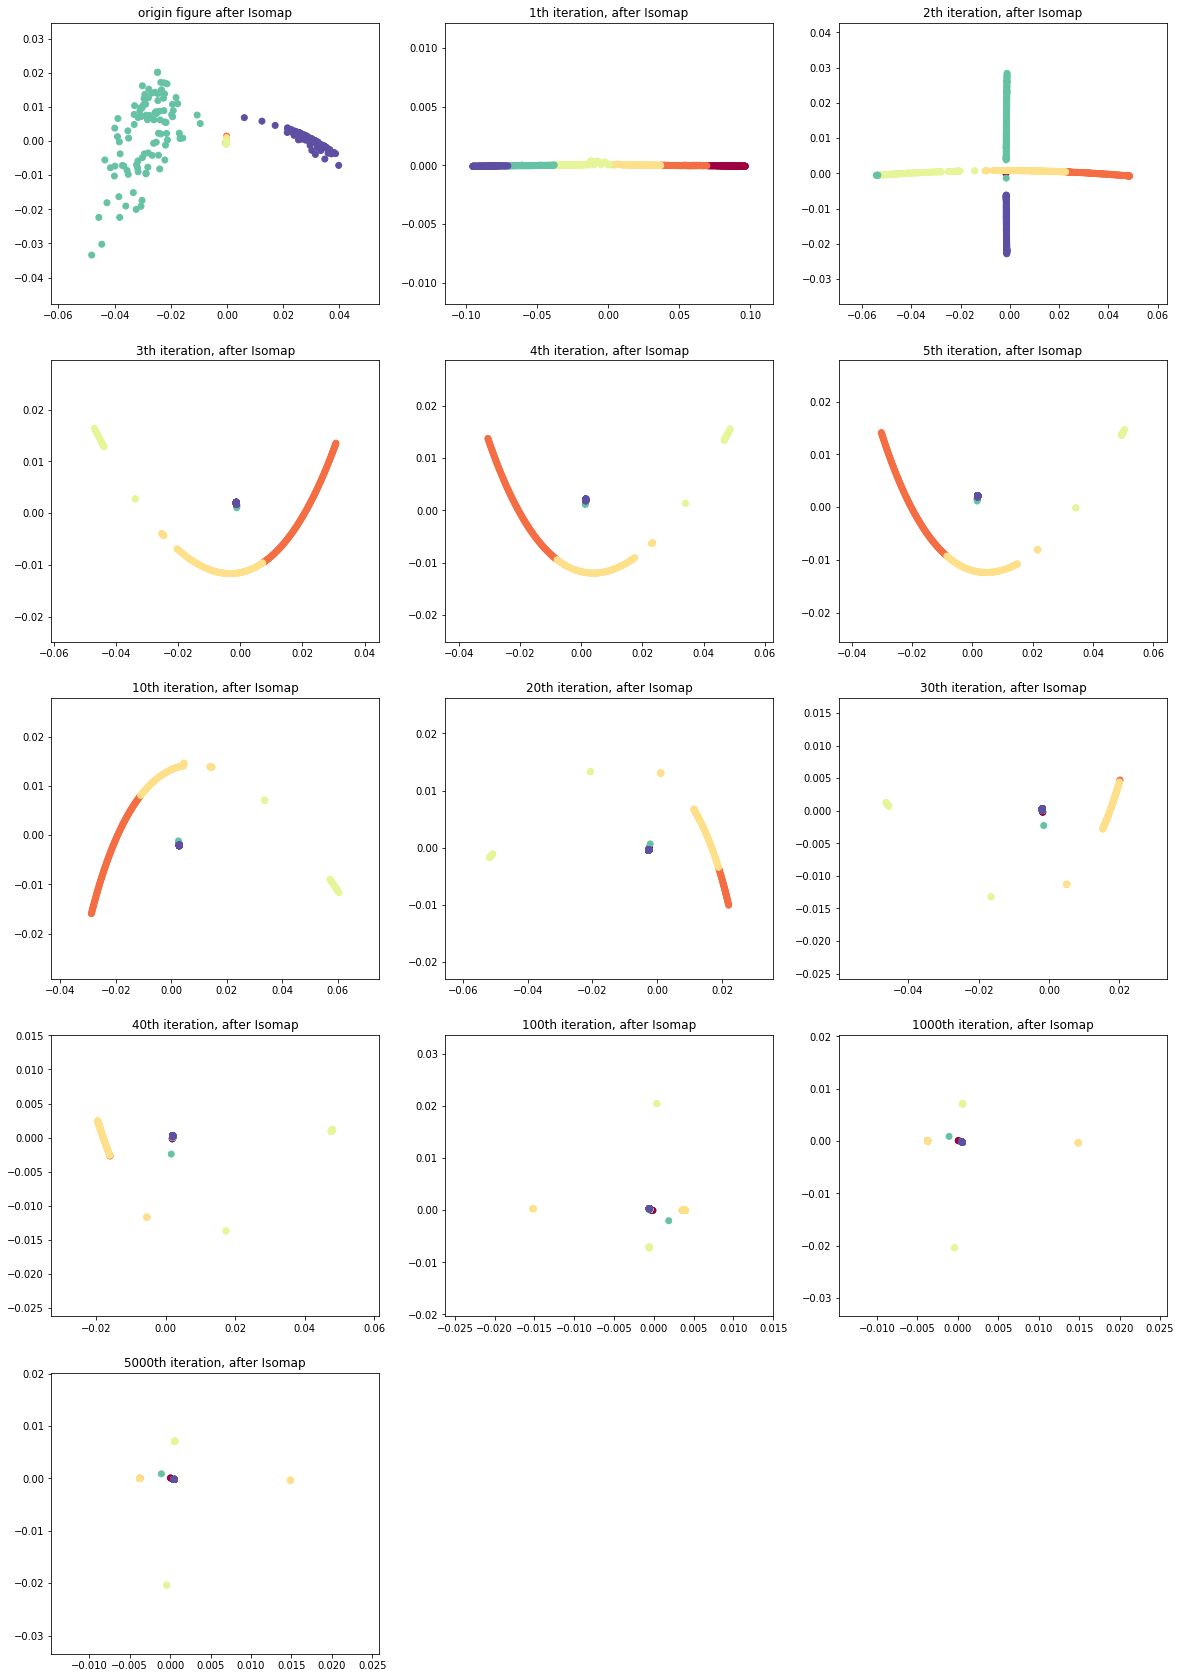

In [7]:
# 需要可视化。在low-dimensional embedding下观察（LLE，ISOMAP）
# 目的是看在第i次迭代中，embedding在低维有没有（线性）可分的情况。

from sklearn import manifold
# Isomap Method, for 3-d eigenvectors
n_neighbors = 10
n_components = 2 # number of coordinates

fig = plt.figure(figsize=(20, 30))
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(v[:, :3])
ax = fig.add_subplot(5, 3, 1)
ax.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
ax.set_title("origin figure after Isomap")

for i in range(cor.shape[1]):
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(cor[:3, i, :].T)
    ax = fig.add_subplot(5, 3, i+2)
    ax.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
    ax.set_title("%ith iteration, after Isomap" %iter_count[i])
plt.show()


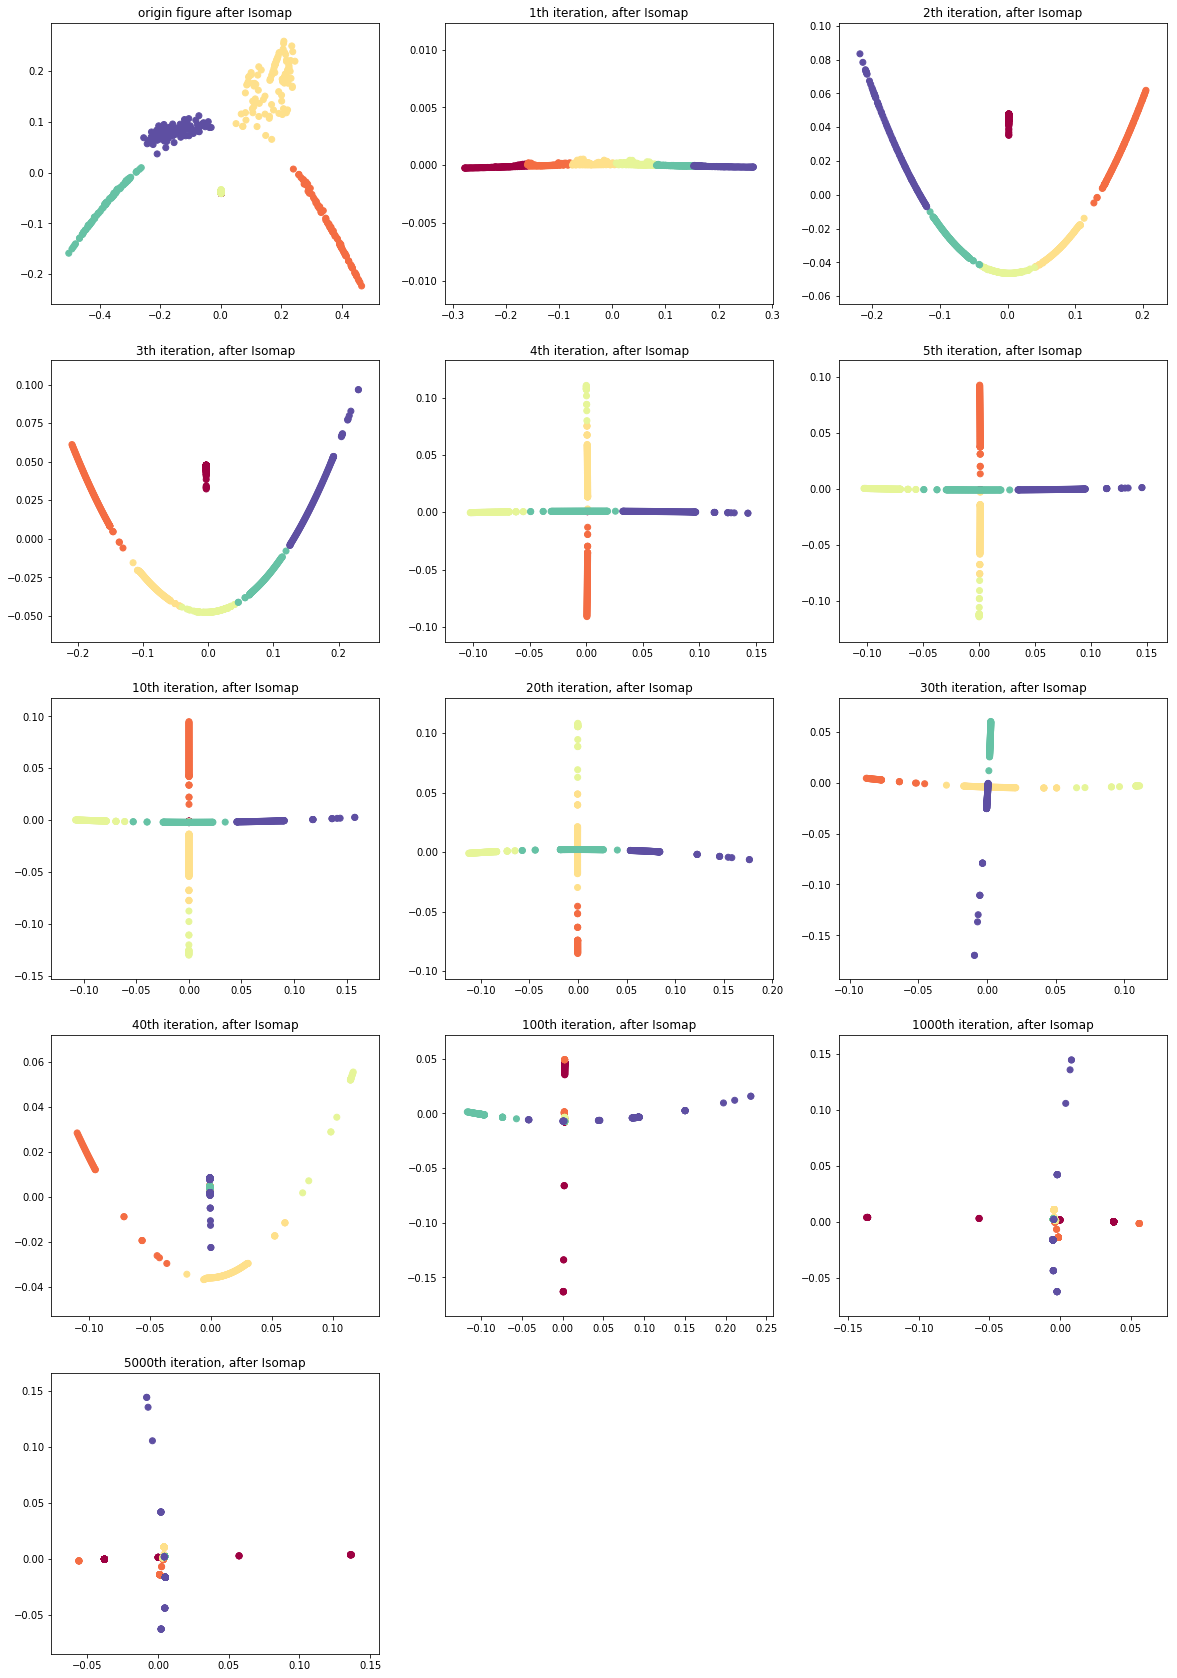

In [8]:
# 高维的距离信息保存更多，距离连续更好的看出？
# Isomap Method, for high-dimension (10d) eigenvectors
n_neighbors = 10
n_components = 2 # number of coordinates

# new cor, select 10d eigenvevtors
high_cor = mutiple_vector_admm(v[:, :10], iter_count, iteration_mode='iter_none', label=label, num_cuts=5) 

fig = plt.figure(figsize=(20, 30))
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(v[:, :10])
ax = fig.add_subplot(5, 3, 1)
ax.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
ax.set_title("origin figure after Isomap")

for i in range(cor.shape[1]):
    Y = manifold.Isomap(n_neighbors, n_components).fit_transform(high_cor[:10, i, :].T)
    ax = fig.add_subplot(5, 3, i+2)
    ax.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
    ax.set_title("%ith iteration, after Isomap" %iter_count[i])
plt.show()


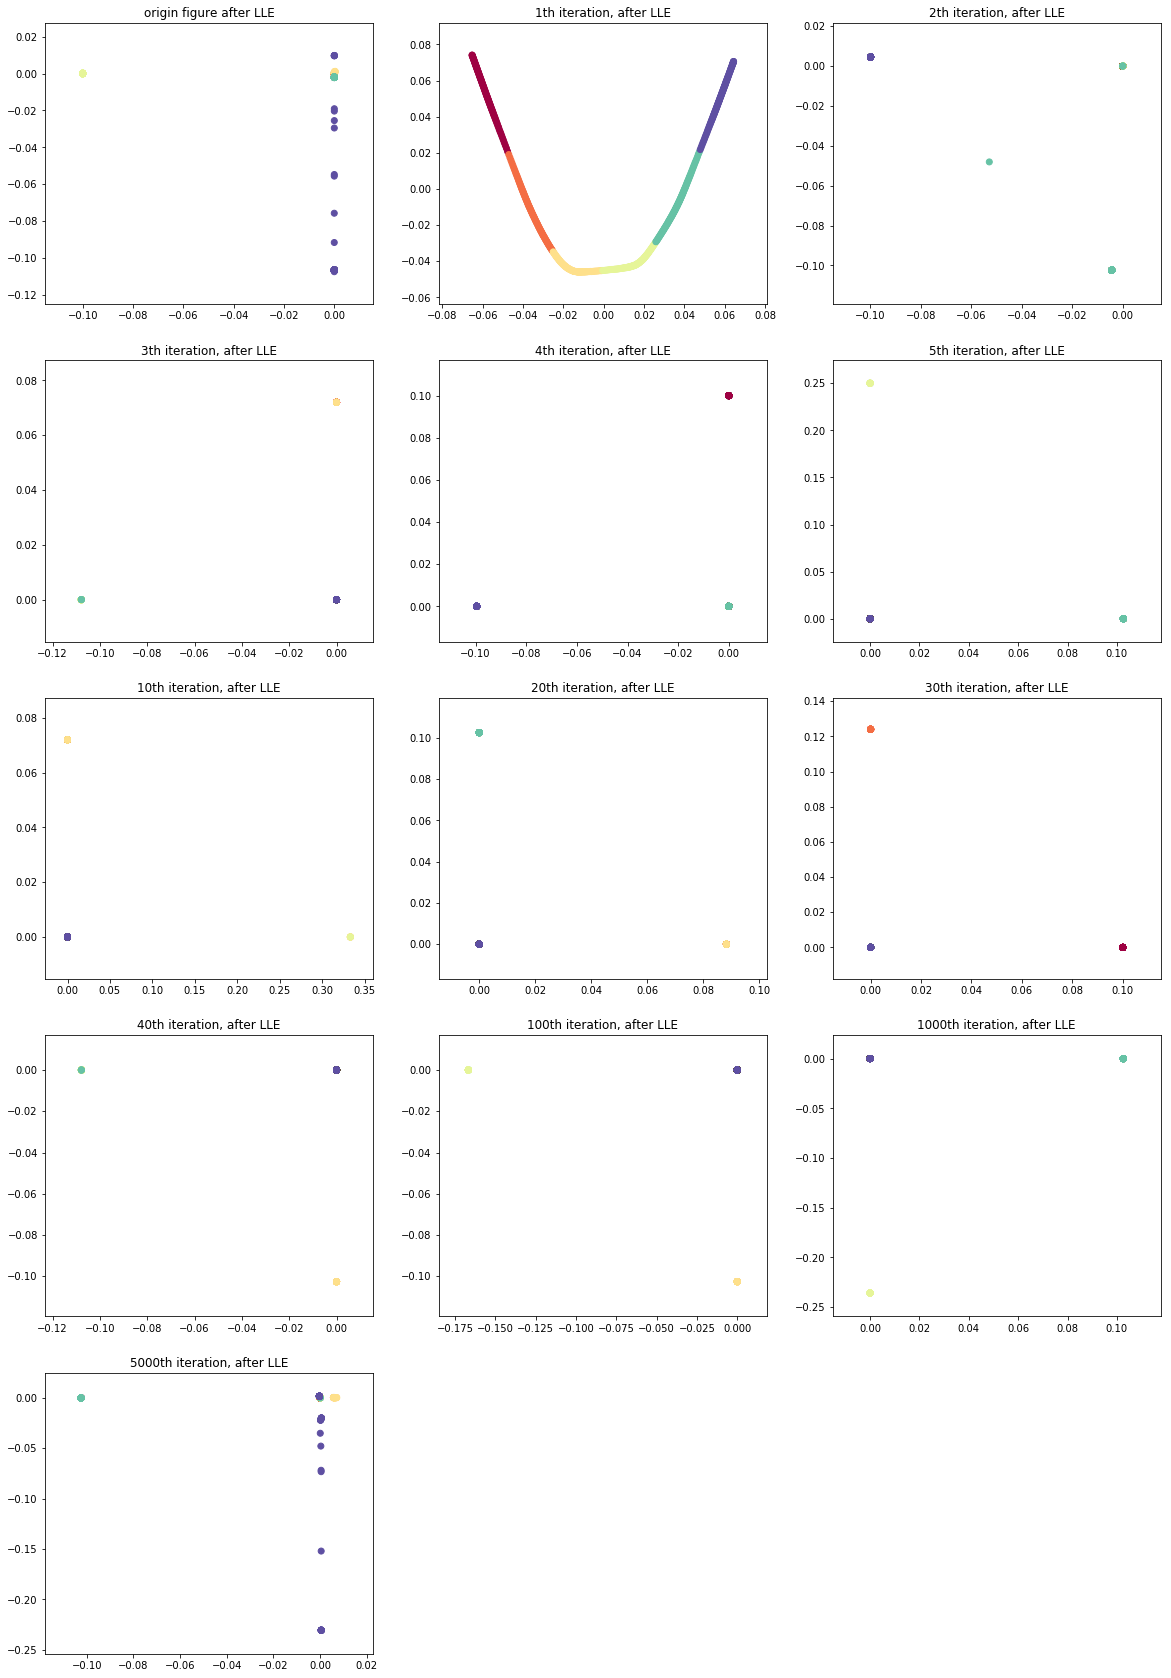

In [12]:
# LLE Method
cor = mutiple_vector_admm(v[:, :3], iter_count, iteration_mode='iter_none', label=label, num_cuts=5) 

n_neighbors = 5
n_components = 2 # number of coordinates

fig = plt.figure(figsize=(20, 30))
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components).fit_transform(v[:, :3])
ax = fig.add_subplot(5, 3, 1)
ax.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
ax.set_title("origin figure after LLE")

for i in range(cor.shape[1]):
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components).fit_transform(cor[:3, i, :].T)
    ax = fig.add_subplot(5, 3, i+2)
    ax.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
    ax.set_title("%ith iteration, after LLE" %iter_count[i])
plt.show()

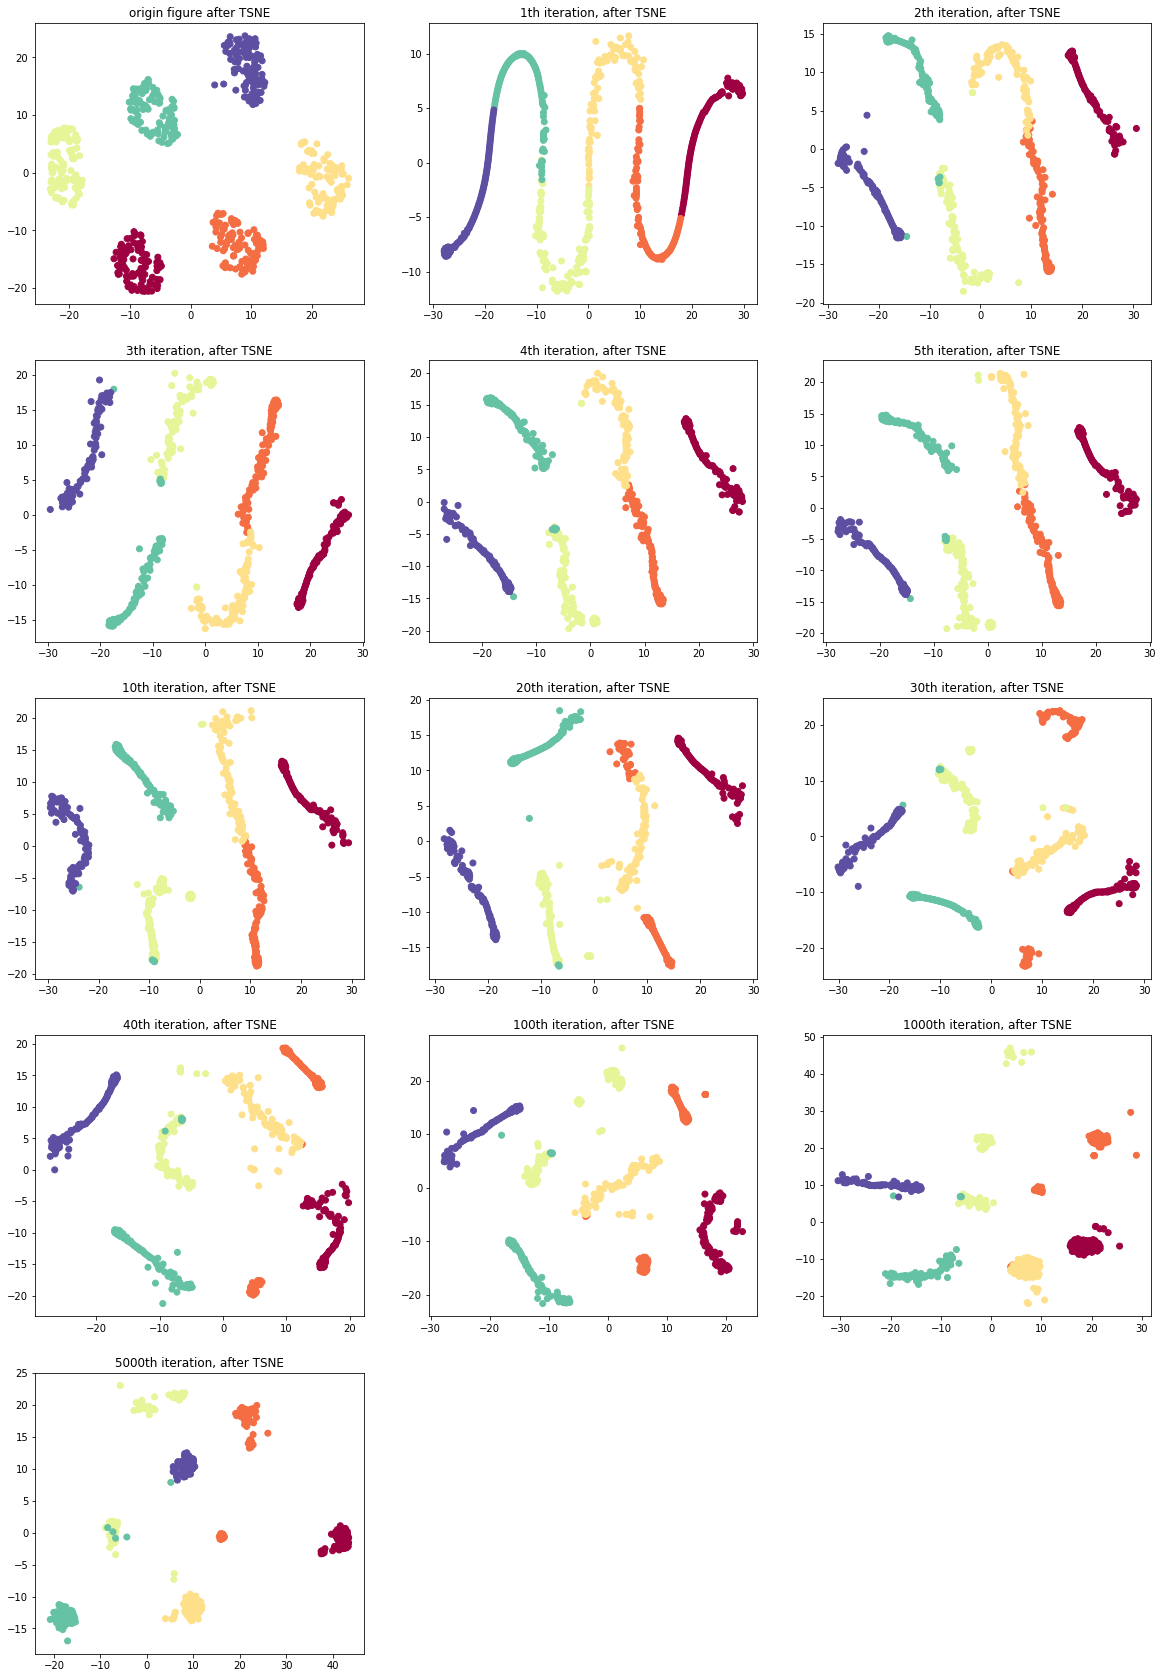

In [16]:
# TSNE Method
# LLE和IIsomap距离信息反映不直观。TSNE对距离和簇间关系的反映更为明显。
cor = mutiple_vector_admm(v[:, :3], iter_count, iteration_mode='iter_none', label=label, num_cuts=5) 

n_neighbors = 5
n_components = 2 # number of coordinates

fig = plt.figure(figsize=(20, 30))
Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(v[:, :3])
ax = fig.add_subplot(5, 3, 1)
ax.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
ax.set_title("origin figure after TSNE")

for i in range(cor.shape[1]):
    Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(cor[:3, i, :].T)
    ax = fig.add_subplot(5, 3, i+2)
    ax.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
    ax.set_title("%ith iteration, after TSNE" %iter_count[i])
plt.show()

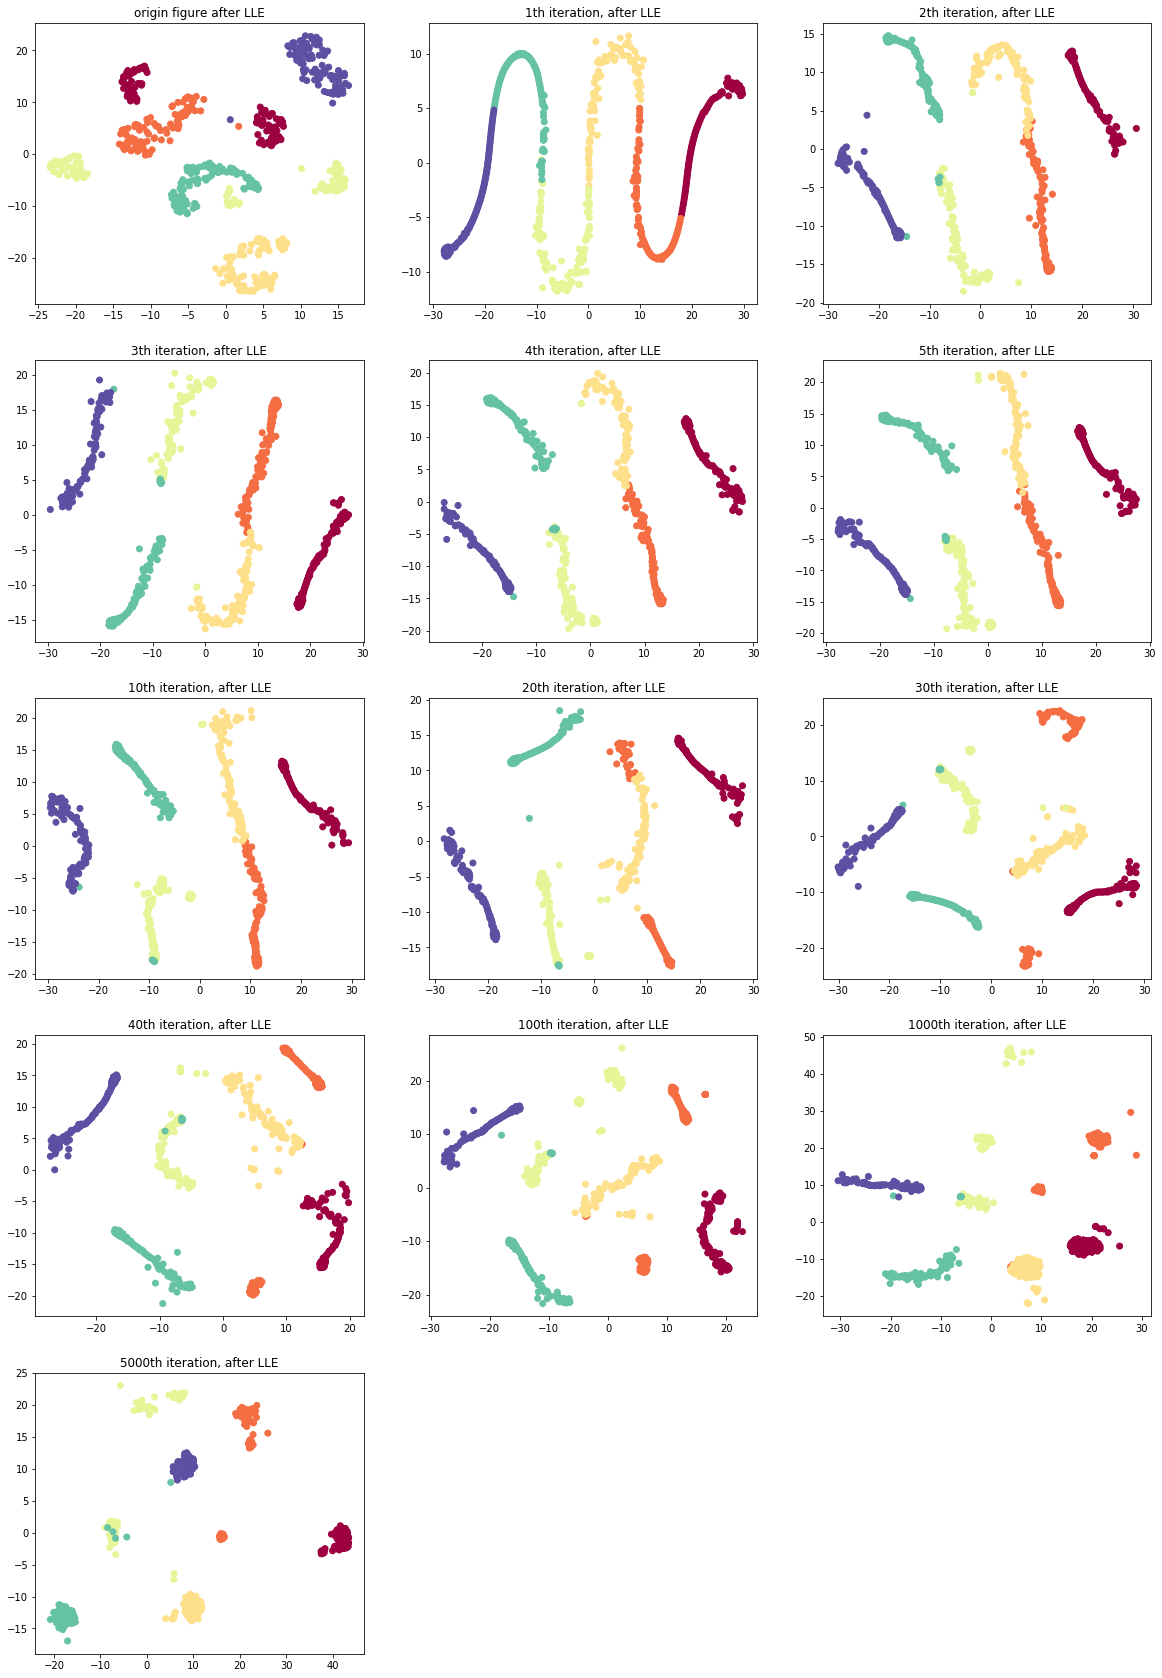

In [17]:
# TSNE Method, and choose high(10d) eigenvectors
# 维数越高，距离信息增多，但是无效信息也可能变大。3维的谱空间已经保留了全部分类信息。
high_cor = mutiple_vector_admm(v[:, :10], iter_count, iteration_mode='iter_none', label=label, num_cuts=5) 

n_neighbors = 5
n_components = 2 # number of coordinates

fig = plt.figure(figsize=(20, 30))
Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(v[:, :10])
ax = fig.add_subplot(5, 3, 1)
ax.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
ax.set_title("origin figure after LLE")

for i in range(cor.shape[1]):
    Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(cor[:10, i, :].T)
    ax = fig.add_subplot(5, 3, i+2)
    ax.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
    ax.set_title("%ith iteration, after LLE" %iter_count[i])
plt.show()

In [ ]:
# 随着迭代，每根轴上坐标改变，在没有收敛的时候会出现一个线状的流形。流形的密度不均匀。同簇密度大，簇间密度小。
# 如果我们能够在线状流形上找到点的排列顺序，我们也可以用稀疏性去约束求解了。